# Was last year's weather extreme?
<break />

## Motivation 
<break />

Scientists have found that the earth has warmed by 1 degree C from the pre-industrial era (https://www.ipcc.ch/sr15/). Most of this warming has been attributed to human activity - specifically the increase in greenhouse gas emissions including carbon dioxide, methane, nitrous oxide, CFCs and other gasses. The pace of warming has accelerated over the past several decades and is expected to continue if global efforts fail to slow and reverse these trends.<break />

Media coverage of climate change has picked up in recent years. News coverage highlighting extreme weather events, melting glaciers and warmer average global temperatures have been cited as evidence of a changing climate.

## Analysis focus
<break />

To me, the weather in 2018 in Boston felt truly different than prior years, and not just because of increased media coverage. We know that average global temperatures have been increasing for decades, however, I had a sense that rising temperatures wasn't the full story in 2018.

This analysis will investigate whether the data supports the notion that Boston's weather in 2018 was unusual relative to prior years. For example, did temperature patterns in 2018 stand out compared to prior years? If so, how did they stand out? Apart from temperature, what other weather patterns else contributed to a sense that 2018 was an unusual year from a climate perspective?

Note that there are many avenues to explore, but I will choose only a few to investigate.

## Data
<break />

Weather is highly variable from one year to the next, so a multi-year dataset is required to perform this analysis. 

I selected a  data set from the National Oceanic and Atmospheric Administration that covers 68 years, dating back to 1 January 1950. The dataset includes daily weather indicators, including maximum, minimum and average temperatures, precipitation, humidity and other information. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Reading data and cleaning data to remove columns without data
df = pd.read_csv('WeatherData.csv')
df = df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1)

In [3]:
df.head()

,Weather Station Name,State,Date,Year,Month,Day,Max_Degrees_F,Min_Degrees_F,Avg_Degrees_F,Humidity,Wind_Speed,Precipitation_in,HDD_sum,CDD_sum
0,Boston Logan Intl Arpt,MA,1/1/1950 0:00,1950,1,1,44.0,32.0,38.0,NaN,NaN,0.00,27,0
1,Boston Logan Intl Arpt,MA,1/2/1950 0:00,1950,1,2,40.0,31.0,36.0,NaN,NaN,0.01,29,0
2,Boston Logan Intl Arpt,MA,1/3/1950 0:00,1950,1,3,56.0,40.0,48.0,NaN,NaN,0.07,17,0
3,Boston Logan Intl Arpt,MA,1/4/1950 0:00,1950,1,4,64.0,55.0,60.0,NaN,NaN,0.00,5,0
4,Boston Logan Intl Arpt,MA,1/5/1950 0:00,1950,1,5,61.0,45.0,53.0,NaN,NaN,0.03,12,0


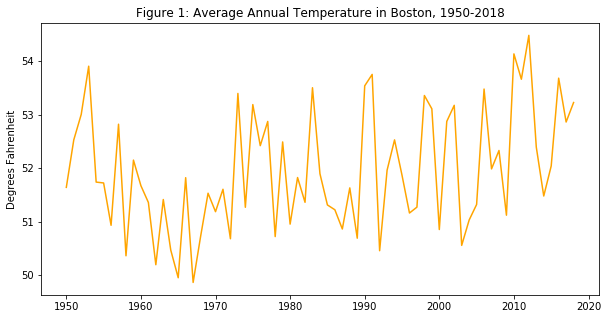

In [4]:
#Annual average temperatures in Boston

x1 = df.groupby('Year').mean()['Avg_Degrees_F']

plt.figure(figsize=(10, 5))
plt.plot(x1, color='orange')
plt.ylabel('Degrees Fahrenheit')
plt.title('Figure 1: Average Annual Temperature in Boston, 1950-2018')
plt.show()

### Notes on Figure 1: Average Annual Temperature in Boston

A high-level inspection shows that the data looks reliable. Annual average temperatures fall within a reasonable band of 50-55 deg F. In addition, Average annual temperatures fluctuate annually, but differences from one year to the next are generally within 1-3 F, which also seem reasonable. Finally, average annual temperatures have gradually increased over time which is consistent with the consensus of the scientific community (see the link to the latest IPCC report under the Motivation section, above) that global average temperatures have been warming for decades. Overall, nothing really sticks out that would indicate the dataset is not reliable.

<break />

Taking a closer look at 2018, it looks like 2018 was hotter than average but it does not appear as though it was an outlier. Looking at the average annual temperature is helpful, but it may mask unusual variability on a monthly, daily or hourly basis. 
<break />

For the next step, let's look at what is driving the2018  average annual temperature higher on a more granular level. Assessing 2018 weather on a monthly basis can shed some light on monthly or seasonal variability.

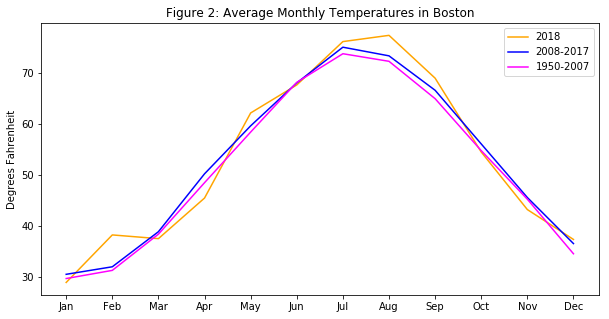

In [5]:
#Monthly average temperatures in Boston in 2018 and prior periods

y1 = df[(df.Year == 2018)].groupby('Month').mean()['Avg_Degrees_F']
y2 = df[(df.Year < 2018) & (df.Year > 2007)].groupby('Month').mean()['Avg_Degrees_F']
y3 = df[(df.Year < 2008)].groupby('Month').mean()['Avg_Degrees_F']

plt.figure(figsize=(10, 5))
plt.plot(y1, color='orange')
plt.plot(y2, color='blue')
plt.plot(y3, color='magenta')
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12],['Jan','Feb', 'Mar','Apr', 'May','Jun','Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.ylabel('Degrees Fahrenheit')
plt.title('Figure 2: Average Monthly Temperatures in Boston')
plt.gca().legend(('2018','2008-2017','1950-2007'))
plt.show()

### Notes on Figure 2: Average Monthly Temperatures in Boston
Looking at the data on a monthly basis reveals that the average temperatures in Boston during the summer of 2018 (July - Sept) were higher than summer averages over the preceding 10 years and a longer 57 year period. Also, consistent with earlier findings, we see that average monthly temperatures in the most recent 10 year period (2008-2017) are consistently higher than the earlier period from 1950-2007.  

Note that there was also a significant bump in temperatures during February. While this is certainly worthy of further inspection, this analysis will focus just on the bump in summer temperatures in 2018.

The next step will dive deeper to understand why the summer of 2018 was hotter than previous years. For example, was there a heat-wave? Did daily low temperatures not fall as far as normal? The next couple steps will look at daily variability in 2018 compared to prior years to see if we can answer some of these questions.

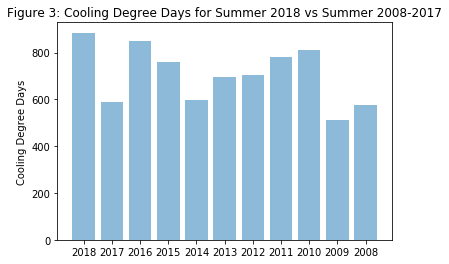

In [6]:
#Analysis of Cooling Degree Day (CDD) information

#Cooling degree day series data for 2018 and 10 prior years
z1 = df[(df.Year == 2018) & (df.Month > 6) & (df.Month < 10)]['CDD_sum']
z2 = df[(df.Year == 2017) & (df.Month > 6) & (df.Month < 10)]['CDD_sum']
z3 = df[(df.Year == 2016) & (df.Month > 6) & (df.Month < 10)]['CDD_sum']
z4 = df[(df.Year == 2015) & (df.Month > 6) & (df.Month < 10)]['CDD_sum']
z5 = df[(df.Year == 2014) & (df.Month > 6) & (df.Month < 10)]['CDD_sum']
z6 = df[(df.Year == 2013) & (df.Month > 6) & (df.Month < 10)]['CDD_sum']
z7 = df[(df.Year == 2012) & (df.Month > 6) & (df.Month < 10)]['CDD_sum']
z8 = df[(df.Year == 2011) & (df.Month > 6) & (df.Month < 10)]['CDD_sum']
z9 = df[(df.Year == 2010) & (df.Month > 6) & (df.Month < 10)]['CDD_sum']
z10 = df[(df.Year == 2009) & (df.Month > 6) & (df.Month < 10)]['CDD_sum']
z11 = df[(df.Year == 2008) & (df.Month > 6) & (df.Month < 10)]['CDD_sum']

#Summing each year's summer CDD and creating a bar chart 
CDD = [z1.sum(),z2.sum(),z3.sum(),z4.sum(),z5.sum(),z6.sum(),z7.sum(),z8.sum(),z9.sum(),z10.sum(),z11.sum()]
CDD_labels = ['2018', '2017', '2016', '2015', '2014', '2013', '2012', '2011', '2010', '2009', '2008']
y_pos = np.arange(len(CDD_labels))
plt.bar(y_pos, CDD, align = 'center', alpha=0.5, tick_label=CDD_labels)
plt.ylabel('Cooling Degree Days')
plt.title('Figure 3: Cooling Degree Days for Summer 2018 vs Summer 2008-2017')
plt.show()

### Notes on Figure 3: Summer Cooling Degree Days in Boston

'Cooling degree days', or CDD, is the number of degrees that a day's average temperature is above 65 F, a rough estimate of what is generally considered a comfortable temperature before a building's A/C unit is turned on. CDD captures temperature patterns when temps are highest - i.e., during the daytime - which is also when they are the most noticeable.  

Figure 3 shows that the summer CDD index has trended up over the past ten years (looking right to left), consistent with trends in overall increases in annual temperatures. 

In addition, Boston's total CDD during the summer of 2018 was higher than the prior 10 years - by a small margin relative to 2016, but generally much higher than most other years. Also, the fact that we had a hot 2018 summer follow a relatively mild 2017 summer (as measured by CDD) probably contributed to the sense that 2018 summer was a little different.

One aspect not captured by CDD is whether daily temperatures cooled down overnight or whether they remained elevated relative to historical patterns. The next analysis looks at whether daily temperatures cooled down overnight or whether they remained elevated relative to historical levels.

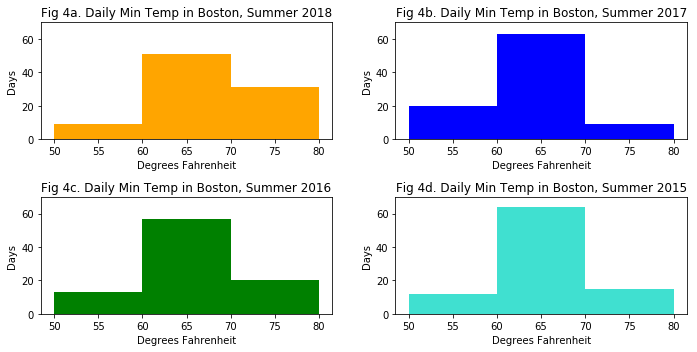

In [7]:
#Daily average temps in August 2018 vs prior years

a1 = df[(df.Year == 2018) & (df.Month > 6) & (df.Month < 10)]['Min_Degrees_F']
a2 = df[(df.Year == 2017) & (df.Month > 6) & (df.Month < 10)]['Min_Degrees_F']
a3 = df[(df.Year == 2016) & (df.Month > 6) & (df.Month < 10)]['Min_Degrees_F']
a4 = df[(df.Year == 2015) & (df.Month > 6) & (df.Month < 10)]['Min_Degrees_F']
a5 = df[(df.Year == 2014) & (df.Month > 6) & (df.Month < 10)]['Min_Degrees_F']
a6 = df[(df.Year == 2013) & (df.Month > 6) & (df.Month < 10)]['Min_Degrees_F']
a7 = df[(df.Year == 2012) & (df.Month > 6) & (df.Month < 10)]['Min_Degrees_F']
a8 = df[(df.Year == 2011) & (df.Month > 6) & (df.Month < 10)]['Min_Degrees_F']

# a2 = df[(df.Year < 2018) & (df.Year > 1999) & (df.Month == 8)].groupby('Day').mean()['Min_Degrees_F']

plt.figure(figsize=(10, 5))
plt.subplot(2,2,1)
plt.hist(a1,bins=[50,60,70,80], color='orange')
plt.xlabel('Degrees Fahrenheit')
plt.ylabel('Days')
plt.ylim(0,70)
plt.title('Fig 4a. Daily Min Temp in Boston, Summer 2018')

plt.subplot(2,2,2)
plt.hist(a2,bins=[50,60,70,80], color='blue')
plt.xlabel('Degrees Fahrenheit')
plt.ylabel('Days')
plt.ylim(0,70)
plt.title('Fig 4b. Daily Min Temp in Boston, Summer 2017')

plt.subplot(2,2,3)
plt.hist(a3,bins=[50,60,70,80], color='green')
plt.xlabel('Degrees Fahrenheit')
plt.ylabel('Days')
plt.ylim(0,70)
plt.title('Fig 4c. Daily Min Temp in Boston, Summer 2016')

plt.subplot(2,2,4)
plt.hist(a4,bins=[50,60,70,80], color='turquoise')
plt.xlabel('Degrees Fahrenheit')
plt.ylabel('Days')
plt.ylim(0,70)
plt.title('Fig 4d. Daily Min Temp in Boston, Summer 2015')


plt.tight_layout()
plt.show()

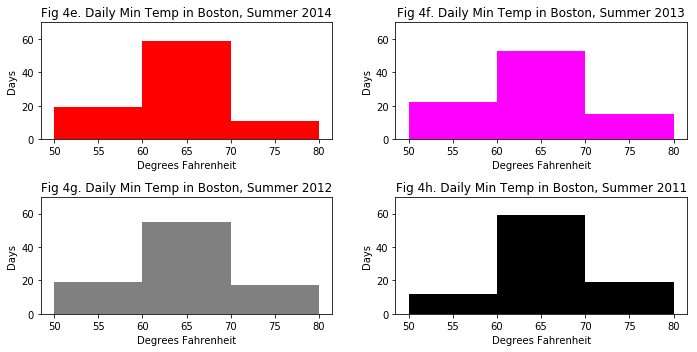

In [8]:
plt.figure(figsize=(10, 5))

plt.subplot(2,2,1)
plt.hist(a5,bins=[50,60,70,80], color='red')
plt.xlabel('Degrees Fahrenheit')
plt.ylabel('Days')
plt.ylim(0,70)
plt.title('Fig 4e. Daily Min Temp in Boston, Summer 2014')

plt.subplot(2,2,2)
plt.hist(a6,bins=[50,60,70,80], color='magenta')
plt.xlabel('Degrees Fahrenheit')
plt.ylabel('Days')
plt.ylim(0,70)
plt.title('Fig 4f. Daily Min Temp in Boston, Summer 2013')

plt.subplot(2,2,3)
plt.hist(a7,bins=[50,60,70,80], color='grey')
plt.xlabel('Degrees Fahrenheit')
plt.ylabel('Days')
plt.ylim(0,70)
plt.title('Fig 4g. Daily Min Temp in Boston, Summer 2012')

plt.subplot(2,2,4)
plt.hist(a8,bins=[50,60,70,80], color='black')
plt.xlabel('Degrees Fahrenheit')
plt.ylabel('Days')
plt.ylim(0,70)
plt.title('Fig 4h. Daily Min Temp in Boston, Summer 2011')

plt.tight_layout()
plt.show()

### Notes on Figures 4a-4h

Figures 4a-4h show the number of days during the summer where minimum temperatures fell between 50-60 F, 60-70 F and 70-80 F. 

Figures 4a-4h  show that the summer 2018 had significantly more days where the minimum temperatures fell in the highest range - i.e., between 70-80 degrees. This means that in addition to having hotter daytime temperatures, summer temperatures did not cool off as much during the nighttime as compared to prior years.  

Up to this point, the focus has been on temperature. However, humidity is another important factor in how people perceive the weather. In humid conditions, people perceive temperatures to be hotter because of the reduction in evaporation of perspiration. 

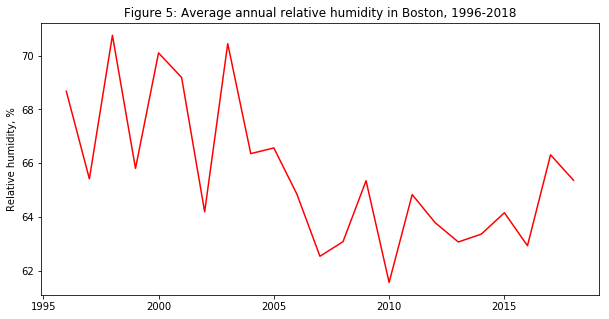

In [13]:
# Relative humidity analysis

z1 = df.groupby('Year').mean()['Humidity']

plt.figure(figsize=(10, 5))
plt.plot(z1, color='red')
plt.ylabel('Relative humidity, %')
plt.title('Figure 5: Average annual relative humidity in Boston, 1996-2018')
plt.show()

### Notes on Figure 5: Relative Humidity

Figure 5 shows annual average **relative humidity** over the past two decades. 

Humidity is a measure of the volume of water vapor in the air at a given temperature. As the air heats up, it can hold more moisture. Relative humidity is a measure of the actual level of water vapor in the air relative to its potential.

Figure 5 shows that relative humidity declined from 1995 to 2016. Over the same period, average temperatures increased (see Figure 1). The implication is that over this period, the amount of water vapor in the air did not keep pace with the rise in temperatures. 

Over the past two years, relative humidity jumped to its highest levels in over 10 years. This means that the amount of water vapor in the air has started to pick back up and keep pace with rising temperatures. 

So, what does this mean? Temperature increases over the past 10 years have been mitigated somewhat by the decrease in relative humidity. However, humidity has started to pick up over the past couple of years and together with rising temperatures, is compounding the sense that it is warmer outside. 

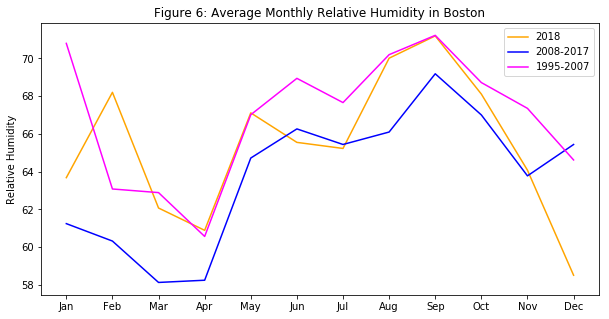

In [18]:
#Average Monthly Relative Humidity

h1 = df[(df.Year == 2018)].groupby('Month').mean()['Humidity']
h2 = df[(df.Year < 2018) & (df.Year > 2007)].groupby('Month').mean()['Humidity']
h3 = df[(df.Year < 2008) & (df.Year > 1994)].groupby('Month').mean()['Humidity']

plt.figure(figsize=(10, 5))
plt.plot(h1, color='orange')
plt.plot(h2, color='blue')
plt.plot(h3, color='magenta')
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12],['Jan','Feb', 'Mar','Apr', 'May','Jun','Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.ylabel('Relative Humidity')
plt.title('Figure 6: Average Monthly Relative Humidity in Boston')
plt.gca().legend(('2018','2008-2017','1995-2007'))
plt.show()

### Notes on Figure 6: Average Monthly Relative Humidity

Figure 6 shows average relative humidity on a monthly over three periods: 1995-2007, 2008-2017 and 2018. 

The average relative humidity across almost all months in '95-07 was higher than in the period '07-'17. This is consistent with the findings from Figure 5 - as temperatures have increased, relative humidity has not kept pace. However, in 2018, we see relative humidity reverting to trends from the period '95-'07, and this is true in the summer months.

## Conclusions

There are a few conclusions we can draw from this analysis:

 - Boston's summer temperatures in 2018 stand out relative to prior years - while Boston's 2018 annual average temperature was on the high end, what really stood out were higher than average summer temperatures 
 - Summer cooling degree days (CDDs), a heat index, hit a ten-year peak in 2018
 - Summer 2018 also had an unusually high number of days where higher than average daily temperatures never really cooled off during the evening / nighttime (i.e., temperatures stayed above 70F)
 - Relative humidity started to catch up with rising temperatures in 2018. Combined with rising temperatures, this likely contributed to a sense that temperatures were abnormal, particularly during the summer. 
 
## Areas for Further Research

For further research, it would be interesting to tie in other data to understand the relationship between rising temperatures and humidity and the rise and spread of certain diseases (e.g., tick/mosquito-borne illnesses), agricultural productivity in the US Midwest, groundwater levels or increases in residential electricity use. An econometric analysis could be performed to forecast the impact of rising temperatures on the aforementioned variables.